In [1]:
setwd("~/Upd-Germline-Genomics")
library(extraDistr)
library(forcats)
library(future)
library(future.apply)
library(ggplot2)
library(pracma)
library(SummarizedExperiment)
library(targets)
library(zoo)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

In [ ]:
source("_targets.R")


Attaching package: ‘magrittr’


The following object is masked from ‘package:GenomicRanges’:

    subtract


The following objects are masked from ‘package:pracma’:

    and, mod, or


Loading required package: viridisLite


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects 

In [3]:
tar_load(
  c(
    matches("bulk_reads_misc_repli.*chr"),
    repli.experiment_Germline_chr,
    repli.experiment_Kc167_chr,
    repli.experiment_S2_chr,
    repli.experiment_Somatic_chr,
    repli.granges_tj_E2_chr,
    repli.prior.distribution,
    repli.polar.coordinates,
    repli.posterior.unscaled_Germline_chr,
    repli.posterior.unscaled_Kc167_chr,
    repli.posterior.unscaled_S2_chr,
    repli.posterior.unscaled_Somatic_chr,
    repli.posterior.xform.centering_Germline_chr,
    repli.posterior.xform.centering_Kc167_chr,
    repli.posterior.xform.centering_S2_chr,
    repli.posterior.xform.centering_Somatic_chr,
    repli.sliding.weights
  )
)

In [4]:
print(granges_chr <- metadata(repli.experiment_Germline_chr)$granges)

GRanges object with 139491 ranges and 0 metadata columns:
            seqnames    ranges strand
               <Rle> <IRanges>  <Rle>
  2L              2L    1-1000      *
  2L              2L 1001-2000      *
  2L              2L 2001-3000      *
  2L              2L 3001-4000      *
  2L              2L 4001-5000      *
  ..             ...       ...    ...
     211000022279929    1-2207      *
     211000022279931    1-1724      *
     211000022279933    1-1108      *
     211000022279934    1-1643      *
     211000022279940    1-4361      *
  -------
  seqinfo: 1870 sequences from an unspecified genome


In [5]:
library(rtracklayer)
genome <- import(FastaFile("references/dmel-r6.47.fa"))
binwidth <- 250L
(
  rDNA <- slidingWindows(GRanges("rDNA", IRanges(1, width=length(genome[[grep("rDNA", names(genome))]])), seqlengths = c(rDNA = length(genome[[grep("rDNA", names(genome))]]))), width = binwidth, step = binwidth)[[1]]
)

GRanges object with 308 ranges and 0 metadata columns:
        seqnames      ranges strand
           <Rle>   <IRanges>  <Rle>
    [1]     rDNA       1-250      *
    [2]     rDNA     251-500      *
    [3]     rDNA     501-750      *
    [4]     rDNA    751-1000      *
    [5]     rDNA   1001-1250      *
    ...      ...         ...    ...
  [304]     rDNA 75751-76000      *
  [305]     rDNA 76001-76250      *
  [306]     rDNA 76251-76500      *
  [307]     rDNA 76501-76750      *
  [308]     rDNA 76751-76973      *
  -------
  seqinfo: 1 sequence from an unspecified genome

In [6]:
source("_targets.R")

In [7]:
table(cigar_ref_length(bulk_reads_misc_repli.bam_tj_E2_chr$cigar))


    82     83     84     85     86     87     88     89     90     91     92 
    15     12    118    117    254    263    740    828   1026   1202   1152 
    93     94     95     96     97     98     99    100    101    102    103 
  1729   2275   2517   3280   3821   4902   8009 605040   8826   3498   1070 
   104    105    106    107    108    109    110    111    112    113    114 
   964    609    400    273    226    177    142     99    147     55     60 
   115    116    117    118 
    28      5     47     43 

In [8]:
print(colnames(repli.experiment_Somatic_chr))

[1] "tj_E1" "tj_E2" "tj_G2" "tj_J2" "tj_L1" "tj_L2"


In [9]:
options(max.print = 50)
metadata(repli.experiment_Somatic_chr)

$granges
GRanges object with 139491 ranges and 0 metadata columns:
            seqnames    ranges strand
               <Rle> <IRanges>  <Rle>
  2L              2L    1-1000      *
  2L              2L 1001-2000      *
  2L              2L 2001-3000      *
  2L              2L 3001-4000      *
  2L              2L 4001-5000      *
  ..             ...       ...    ...
     211000022279929    1-2207      *
     211000022279931    1-1724      *
     211000022279933    1-1108      *
     211000022279934    1-1643      *
     211000022279940    1-4361      *
  -------
  seqinfo: 1870 sequences from an unspecified genome

$offset
             tj_E1    tj_E2    tj_G2    tj_J2    tj_L1    tj_L2
     [1,] 4.304982 4.970468 4.385987 4.437823 4.970215 4.476984
     [2,] 4.304982 4.970468 4.385987 4.437823 4.970215 4.476984
     [3,] 4.304982 4.970468 4.385987 4.437823 4.970215 4.476984
     [4,] 4.304982 4.970468 4.385987 4.437823 4.970215 4.476984
     [5,] 4.304982 4.970468 4.385987 4.437823 4

In [10]:
repli_samples <- as_tibble(read.csv("repli/repli_samples.csv"))
repli_code <- c("0.75" = "E", "0.25" = "G", "-0.25" = "J", "-0.75" = "L")
reassay_rdna <- function(experiment) {
  assay <- sapply(
    colnames(experiment),
    \(n) {
      df <- get(str_glue("bulk_reads_misc_repli.bam_{n}_chr"))
      df <- subset(df, rname == "rDNA")
      gr <- GRanges("rDNA", IRanges(single_end_pos_to_midpoint(df)$pos, width=1))
      lookup <- findOverlaps(rDNA, gr)
      is_paired_end <- pull(subset(repli_samples, paste(genotype, paste0(repli_code[as.character(replication_value)], rep), sep="_") == n), "is_paired_end")
      if (is.na(is_paired_end)) {
        is_paired_end <- FALSE
      }
      if (is_paired_end) {
        countOverlaps(rDNA, gr)
      } else {
        sapply(as.list(lookup), \(v) sum(df$dc[v]))
      }
    }
  )
  rownames(assay) <- as.character(start(rDNA))
  experiment <- SummarizedExperiment(
    list(counts = assay),
    colData = colData(experiment),
    rowData = data.frame(seqnames = factor(rep("rDNA", length(rDNA)))),
    metadata = metadata(experiment)
  )
  metadata(experiment)$granges <- rDNA
  metadata(experiment)$offset <- head(metadata(experiment)$offset, length(rDNA))
  experiment
}
reassay_rdna(repli.experiment_Germline_chr)

class: SummarizedExperiment 
dim: 308 8 
metadata(6): granges offset ... beta_regression_size_factors
  beta_regression_feed_y
assays(1): counts
rownames(308): 1 251 ... 76501 76751
rowData names(1): seqnames
colnames(8): nos_E2 nos_G2 ... nos_J4 nos_L4
colData names(8): genotype replication_value ... abbrev name

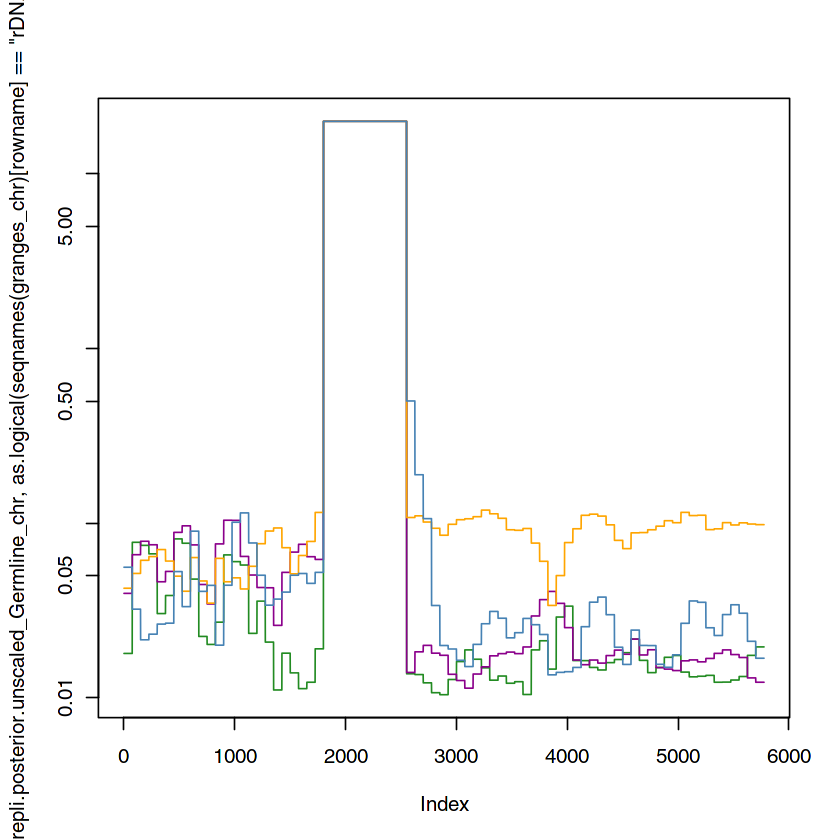

In [11]:
plot(subset(repli.posterior.unscaled_Germline_chr, as.logical(seqnames(granges_chr)[rowname] == "rDNA"))$theta, col="forestgreen", type="l", log="y")
lines(subset(repli.posterior.unscaled_Somatic_chr, as.logical(seqnames(granges_chr)[rowname] == "rDNA"))$theta, col="darkmagenta")
lines(subset(repli.posterior.unscaled_Kc167_chr, as.logical(seqnames(granges_chr)[rowname] == "rDNA"))$theta, col="orange")
lines(subset(repli.posterior.unscaled_S2_chr, as.logical(seqnames(granges_chr)[rowname] == "rDNA"))$theta, col="steelblue")

In [12]:
head(repli.posterior.unscaled_Germline_chr)

rowname,value,prob,theta
<int>,<dbl>,<dbl>,<dbl>
1,0.00000000,1.100498e-32,0.07619386
1,0.02078882,1.078393e-32,0.07619386
1,0.04074850,1.051957e-32,0.07619386
1,0.05994465,1.020916e-32,0.07619386
1,0.07843660,9.850804e-33,0.07619386
1,0.09627820,9.443830e-33,0.07619386


In [13]:
approx(
      x = mid(subset(granges_chr, seqnames == "rDNA")),
      y = repli.posterior.unscaled_Germline_chr$theta[
        match(which(seqnames(granges_chr) == "rDNA"), repli.posterior.unscaled_Germline_chr$rowname)
      ],
      xout = mid(rDNA),
      rule = 2
    )$y

[1] 0.01795088 0.01795088 0.02541941 0.04035646 0.05529350 0.07023055
 [7] 0.07732029 0.07656272 0.07580516 0.07504759 0.07367947 0.07170082
[13] 0.06972216 0.06774350 0.06220690 0.05311237 0.04401784 0.03492331
[19] 0.03139489 0.03343259 0.03547029 0.03750798 0.04387168 0.05456137
[25] 0.06525106 0.07594076 0.08072239 0.07959598 0.07846956 0.07734314
[31] 0.07316286 0.06592871 0.05869456 0.05146041 0.04467072 0.03832548
[37] 0.03198025 0.02563501 0.02218224 0.02162194 0.02106164 0.02050133
[43] 0.02108248 0.02280508 0.02452767 0.02625027 0.03194918 0.04162441
[49] 0.05129964 0.06097488
 [ reached getOption("max.print") -- omitted 258 entries ]

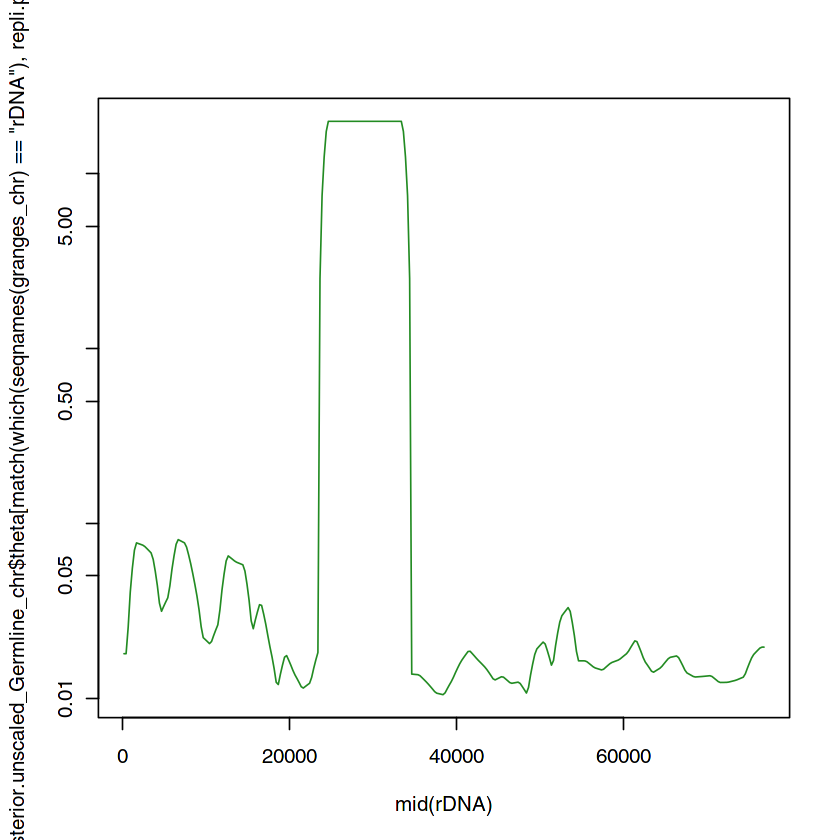

In [14]:
plot(
  mid(rDNA),
  approx(
    x = mid(subset(granges_chr, seqnames == "rDNA")),
    y = repli.posterior.unscaled_Germline_chr$theta[
      match(which(seqnames(granges_chr) == "rDNA"), repli.posterior.unscaled_Germline_chr$rowname)
    ],
    xout = mid(rDNA),
    rule = 2
  )$y,
  col = "forestgreen",
  type = "l",
  log = "y"
)

Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-2’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "igno

rowname,value,prob,theta
<int>,<dbl>,<dbl>,<dbl>
1,0.00000000,2.511993e-30,0.01795088
1,0.02078882,2.714665e-30,0.01795088
1,0.04074850,2.942366e-30,0.01795088
1,0.05994465,3.198593e-30,0.01795088
1,0.07843660,3.487392e-30,0.01795088
1,0.09627820,3.813446e-30,0.01795088


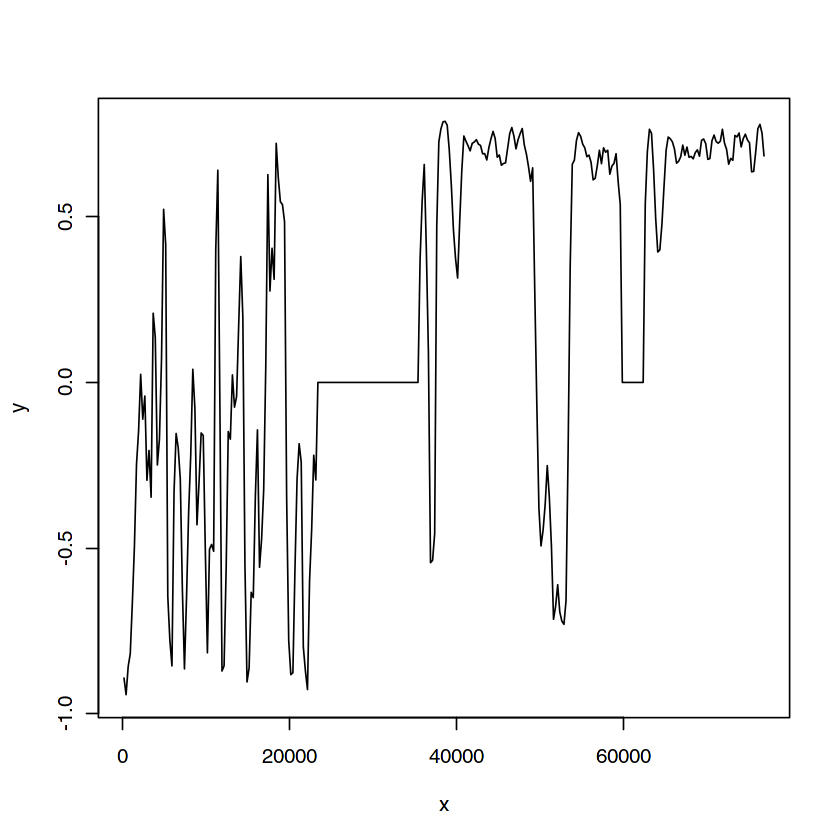

In [15]:
head(
  posterior_Germline <- analyze_repli_experiment(
    reassay_rdna(repli.experiment_Germline_chr),
    repli.sliding.weights,
    repli.polar.coordinates,
    repli.prior.distribution,
    theta = approx(
      x = mid(subset(granges_chr, seqnames == "rDNA")),
      y = repli.posterior.unscaled_Germline_chr$theta[
        match(which(seqnames(granges_chr) == "rDNA"), repli.posterior.unscaled_Germline_chr$rowname)
      ],
      xout = mid(rDNA),
      rule = 2
    )$y,
    xform_scale = 1,
    xform_center = repli.posterior.xform.centering_Germline_chr["center"]
  )
)
plot(
  timing_Germline <-
    posterior_Germline %>%
      summarise(
        value = quantify_repli_experiment(prob, prior = repli.prior.distribution$X),
        .by = "rowname"
      ) %>%
      with(value[match(seq_along(rDNA), rowname)]) %>%
      repli_logistic_beta_to_tanh() %>%
      tibble(
        x = mid(rDNA),
        y = .
      ),
  type = "l"
)

Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-2’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "igno

rowname,value,prob,theta
<int>,<dbl>,<dbl>,<dbl>
1,0.00000000,5.465333e-27,0.04241245
1,0.02078882,5.684341e-27,0.04241245
1,0.04074850,5.921460e-27,0.04241245
1,0.05994465,6.178386e-27,0.04241245
1,0.07843660,6.456989e-27,0.04241245
1,0.09627820,6.759342e-27,0.04241245


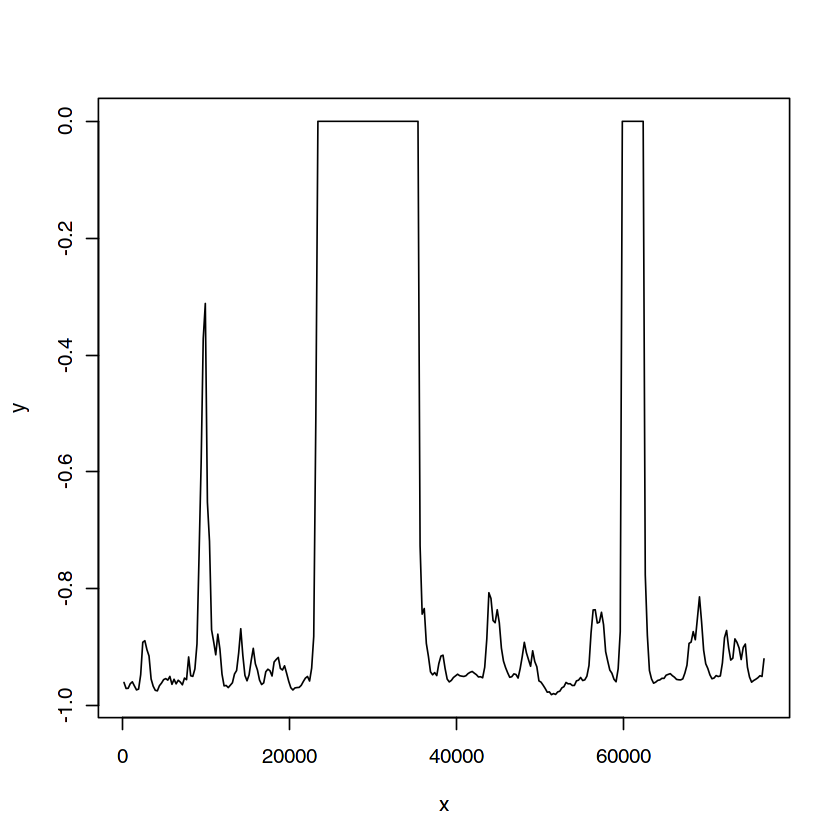

In [16]:
head(
  posterior_Kc167 <- analyze_repli_experiment(
    reassay_rdna(repli.experiment_Kc167_chr),
    repli.sliding.weights,
    repli.polar.coordinates,
    repli.prior.distribution,
    theta = approx(
      x = mid(subset(granges_chr, seqnames == "rDNA")),
      y = repli.posterior.unscaled_Kc167_chr$theta[
        match(which(seqnames(granges_chr) == "rDNA"), repli.posterior.unscaled_Kc167_chr$rowname)
      ],
      xout = mid(rDNA),
      rule = 2
    )$y,
    xform_scale = 1,
    xform_center = repli.posterior.xform.centering_Kc167_chr["center"]
  )
)
plot(
  timing_Kc167 <-
    posterior_Kc167 %>%
      summarise(
        value = quantify_repli_experiment(prob, prior = repli.prior.distribution$X),
        .by = "rowname"
      ) %>%
      with(value[match(seq_along(rDNA), rowname)]) %>%
      repli_logistic_beta_to_tanh() %>%
      tibble(
        x = mid(rDNA),
        y = .
      ),
  type = "l"
)

Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-2’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "igno

rowname,value,prob,theta
<int>,<dbl>,<dbl>,<dbl>
1,0.00000000,1.775970e-16,0.0559604
1,0.02078882,1.851527e-16,0.0559604
1,0.04074850,1.933287e-16,0.0559604
1,0.05994465,2.021855e-16,0.0559604
1,0.07843660,2.117907e-16,0.0559604
1,0.09627820,2.222207e-16,0.0559604


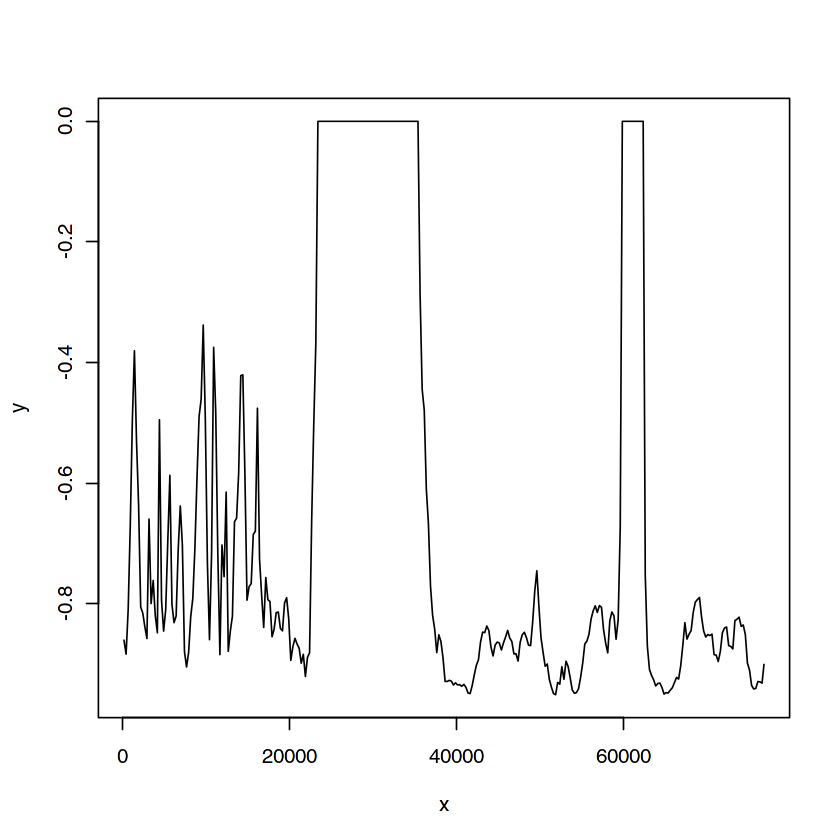

In [17]:
head(
  posterior_S2 <- analyze_repli_experiment(
    reassay_rdna(repli.experiment_S2_chr),
    repli.sliding.weights,
    repli.polar.coordinates,
    repli.prior.distribution,
    theta = approx(
      x = mid(subset(granges_chr, seqnames == "rDNA")),
      y = repli.posterior.unscaled_S2_chr$theta[
        match(which(seqnames(granges_chr) == "rDNA"), repli.posterior.unscaled_S2_chr$rowname)
      ],
      xout = mid(rDNA),
      rule = 2
    )$y,
    xform_scale = 1,
    xform_center = repli.posterior.xform.centering_S2_chr["center"]
  )
)
plot(
  timing_S2 <-
    posterior_S2 %>%
      summarise(
        value = quantify_repli_experiment(prob, prior = repli.prior.distribution$X),
        .by = "rowname"
      ) %>%
      with(value[match(seq_along(rDNA), rowname)]) %>%
      repli_logistic_beta_to_tanh() %>%
      tibble(
        x = mid(rDNA),
        y = .
      ),
  type = "l"
)

Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-2’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "igno

rowname,value,prob,theta
<int>,<dbl>,<dbl>,<dbl>
1,0.00000000,1.266185e-19,0.03963875
1,0.02078882,1.362583e-19,0.03963875
1,0.04074850,1.469296e-19,0.03963875
1,0.05994465,1.587733e-19,0.03963875
1,0.07843660,1.719555e-19,0.03963875
1,0.09627820,1.866724e-19,0.03963875


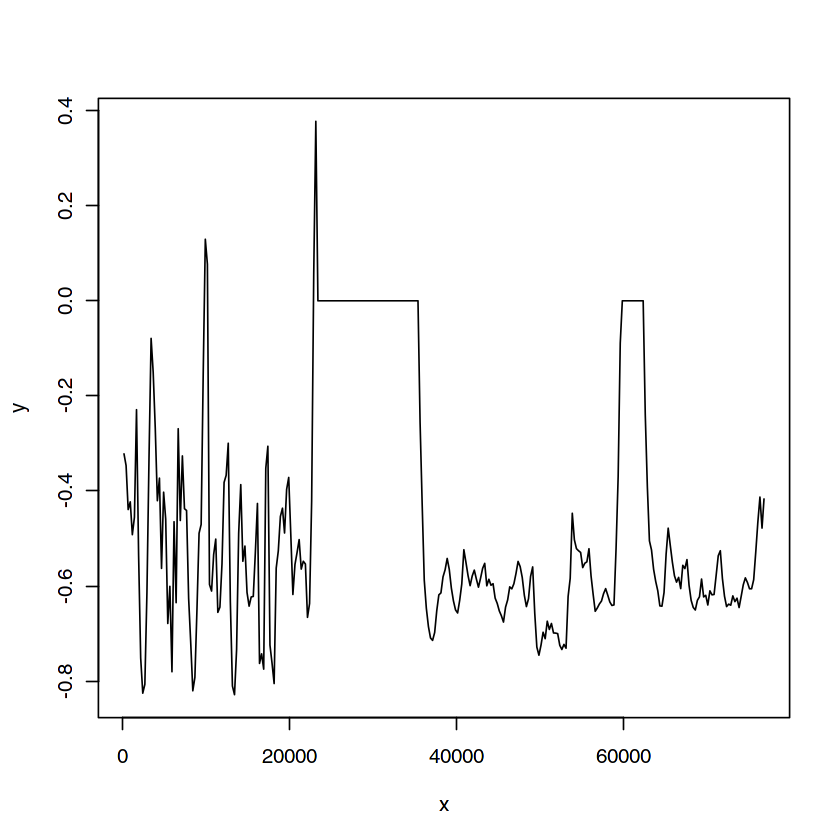

In [18]:
head(
  posterior_Somatic <- analyze_repli_experiment(
    reassay_rdna(repli.experiment_Somatic_chr),
    repli.sliding.weights,
    repli.polar.coordinates,
    repli.prior.distribution,
    theta = approx(
      x = mid(subset(granges_chr, seqnames == "rDNA")),
      y = repli.posterior.unscaled_Somatic_chr$theta[
        match(which(seqnames(granges_chr) == "rDNA"), repli.posterior.unscaled_Somatic_chr$rowname)
      ],
      xout = mid(rDNA),
      rule = 2
    )$y,
    xform_scale = 1,
    xform_center = repli.posterior.xform.centering_Somatic_chr["center"]
  )
)
plot(
  timing_Somatic <-
    posterior_Somatic %>%
      summarise(
        value = quantify_repli_experiment(prob, prior = repli.prior.distribution$X),
        .by = "rowname"
      ) %>%
      with(value[match(seq_along(rDNA), rowname)]) %>%
      repli_logistic_beta_to_tanh() %>%
      tibble(
        x = mid(rDNA),
        y = .
      ),
  type = "l"
)

In [19]:
print(
  LOESS <- reframe(
    rowwise(tibble(celltype = c("Germline", "Somatic", "Kc167", "S2"), quant = list(timing_Germline, timing_Somatic, timing_Kc167, timing_S2))),
    celltype,
    quant
  ) %>%
    group_by(celltype) %>%
    mutate(
      y = predict(loess(y ~ x, span = 0.025))
    )
)

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `y = predict(loess(y ~ x, span = 0.025))`.
ℹ In group 1: `celltype = "Germline"`.
Caused by warning in `simpleLoess()`:
! k-d tree limited by memory. ncmax= 308
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


# A tibble: 1,232 × 3
# Groups:   celltype [4]
   celltype     x       y
   <chr>    <int>   <dbl>
 1 Germline   125 -0.899 
 2 Germline   375 -0.918 
 3 Germline   625 -0.885 
 4 Germline   875 -0.799 
 5 Germline  1125 -0.678 
 6 Germline  1375 -0.484 
 7 Germline  1625 -0.281 
 8 Germline  1875 -0.100 
 9 Germline  2125 -0.0441
10 Germline  2375 -0.0305
# ℹ 1,222 more rows


In [40]:
rRNA <- subset(rtracklayer::import("references/dmel-all-r6.47.gtf"), type == "rRNA")
subset(rRNA, gene_symbol == "pre-rRNA:CR45847")
width(subset(rRNA, gene_symbol == "pre-rRNA:CR45847"))

GRanges object with 1 range and 9 metadata columns:
      seqnames      ranges strand |   source     type     score     phase
         <Rle>   <IRanges>  <Rle> | <factor> <factor> <numeric> <integer>
  [1]     rDNA 66807-74924      + |  FlyBase     rRNA        NA      <NA>
          gene_id      gene_symbol transcript_id   transcript_symbol
      <character>      <character>   <character>         <character>
  [1] FBgn0267507 pre-rRNA:CR45847   FBtr0346881 pre-rRNA:CR45847-RA
                #
      <character>
  [1]        <NA>
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

[1] 8118

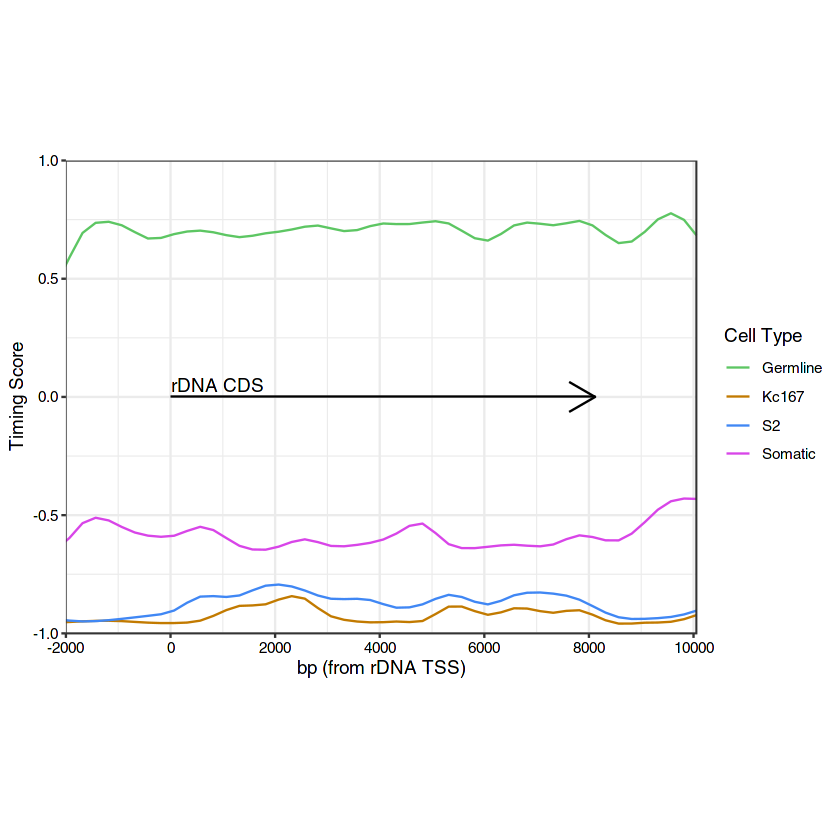

In [44]:
colors <- list(Germline=chic_line_track_colors$germline, Somatic=chic_line_track_colors$somatic, Kc167=hcl(50, 102, 57), S2=hcl(255, 102, 57))
ggplot(
  mutate(LOESS, x = x - start(subset(rRNA, gene_symbol == "pre-rRNA:CR45847"))),
  aes(x, y, color=celltype)
) +
  geom_line() +
  coord_cartesian(c(-2000, NA), c(-1, 1), ex=F) +
  scale_x_continuous(breaks = seq(-2000, 10000, by=2000)) +
  scale_color_manual("Cell Type", values = unlist(colors)) +
  annotate("segment", 0, 0, xend=width(subset(rRNA, gene_symbol == "pre-rRNA:CR45847")), yend=0, arrow = arrow()) +
  annotate("text", 0, 0.05, label = "rDNA CDS", hjust = 0) +
  labs(x = "bp (from rDNA TSS)", y = "Timing Score") +
  theme(aspect.ratio = 0.75)
ggsave("figure/Fig5C.pdf", w=6, h=4)

In [ ]:
which.min(abs(mid(rDNA) - 66807))

[1] 268

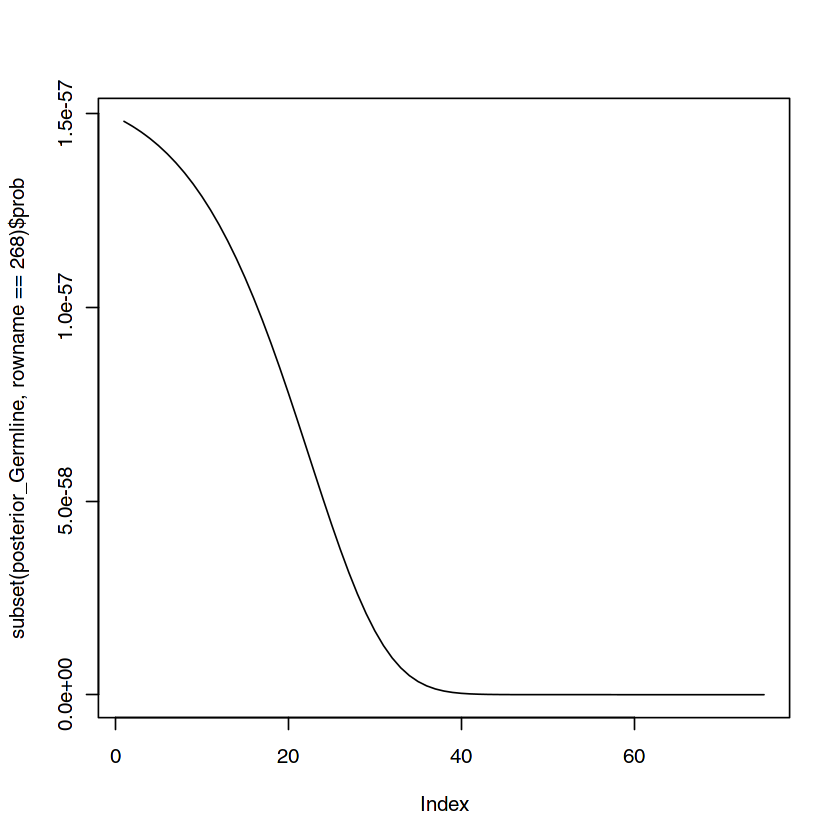

In [ ]:
plot(subset(posterior_Germline, rowname == 268)$prob, type="l")